## Imports

In [1]:
# Imports

import numpy as np
import random
from matplotlib import pyplot
import functions, classes, algorithms, visualize            # custom classes and functions
import multiprocessing                                      # for multithreaded applications
from IPython.core.display import HTML                       # for HTML video inline output
import matplotlib.patches as mpatches
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

## Imports - interactive plot

In [2]:
# Requires tkinter!

interactive = False

if interactive == True:
    import matplotlib
    matplotlib.use('TkAgg')
    interactive = True

## Configuration

In [3]:
# Ranges - grid
range_min: float = -20.0
range_max: float = 20.0
velocity_min: float = -0.4
velocity_max: float = 0.4

# Points in given range
point_spacing: float = 0.01
raw_points_x_axis: list = np.arange(range_min, range_max, point_spacing)
raw_points_y_axis: list = np.arange(range_min, range_max, point_spacing)

# Create meshgrid - matrices from X and Y points
points_x_axis, points_y_axis = np.meshgrid(raw_points_x_axis, raw_points_y_axis)

# Generate Z coordinate from given function (visit functions.py)
function: function = functions.zakharov
points_z_axis: list = function(points_x_axis, points_y_axis)

# Initialize configuration
config: classes.PSOConfiguration = classes.PSOConfiguration(
    range_min=range_min,
    range_max=range_max,
    velocity_min=velocity_min,
    velocity_max=velocity_max,
    point_spacing=point_spacing,
    function=function,
    surface_x=points_x_axis,
    surface_y=points_y_axis,
    surface_z=points_z_axis,
    surface_z_min=np.min(points_z_axis)
)

## Particle Swarm Optimization

37.5893882324215
30.169018576442337
27.54974831673868
26.46647012048462
25.97610098633937
25.743098826218827
25.629565826430778
25.573531772924063
25.54569666833884
25.531824448364763
25.52489965295786
21.999205193812628
15.927095249205458
11.069579057909538
7.251591233779254
5.391321742300245
2.4795611004849314
1.4380947645363322
0.40501879772833144
0.05209131694629218
0.02554038629349317
0.020533637641165836
0.020533637641165836
0.0020023468039953997
0.0010657895731771639
0.0010657895731771639
0.0005788015062726885
3.876884491155833e-05
3.876884491155833e-05
3.876884491155833e-05
7.805928431887031e-08
7.805928431887031e-08
7.805928431887031e-08
7.805928431887031e-08
7.805928431887031e-08
7.805928431887031e-08
7.805928431887031e-08
7.805928431887031e-08
7.805928431887031e-08
3.626458198346333e-08
3.626458198346333e-08
3.626458198346333e-08
3.626458198346333e-08
3.626458198346333e-08
3.626458198346333e-08
9.558962422689893e-10
9.558962422689893e-10
9.558962422689893e-10
9.5589624226898

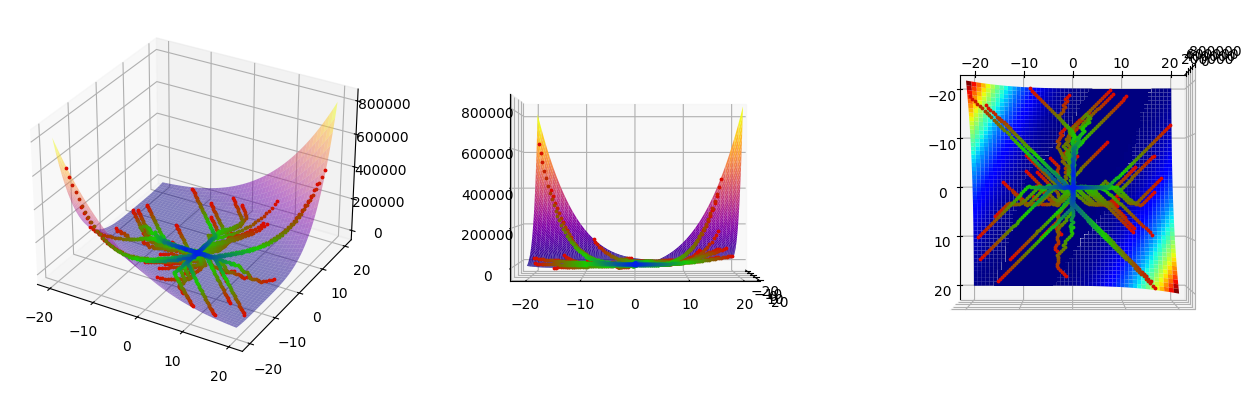

In [4]:
# Initialize plot
plot_1: classes.PlotNonInteractive = classes.PlotNonInteractive(config=config, name="Particle Swarm Optimization", interactive=interactive)

# Perform algo
pso_all, pso_progress = algorithms.particle_swarm_optimization(
    config=config,
    population_size=50,
    iterations=50,
    w=0.5,
    c1=2.0,
    c2=2.0
)

def calc_color(value: float, color1: tuple, color2: tuple):
    if value <= 0.5:
        c = (
            int(color1[0] * (1 - value*2) + color2[0] * value*2),
            int(color1[1] * (1 - value*2) + color2[1] * value*2),
            int(color1[2] * (1 - value*2) + color2[2] * value*2)
        )
    else:
        c = (
            int(color2[0] * (1 - ((value - 0.5) * 2)) + color3[0] * ((value - 0.5)) * 2),
            int(color2[1] * (1 - ((value - 0.5) * 2)) + color3[1] * ((value - 0.5)) * 2),
            int(color2[2] * (1 - ((value - 0.5) * 2)) + color3[2] * ((value - 0.5)) * 2)
        )
    return '#{:02x}{:02x}{:02x}'.format(*c)

def random_color():
    value = random.uniform(0,1)
    color1 = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    color2 = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    c = (
        int(color1[0] * (1 - value) + color2[0] * value),
        int(color1[1] * (1 - value) + color2[1] * value),
        int(color1[2] * (1 - value) + color2[2] * value)
    )
    return '#{:02x}{:02x}{:02x}'.format(*c)

color1 = (230, 0, 0)
color2 = (24, 203, 0)
color3 = (0, 32, 232)
for i, points in enumerate(pso_progress):
    color = random_color()
    for p in points:
        plot_1.add_point(p, calc_color((i+1)/len(pso_progress), color1, color2), 3, 2)

## Particle Swarm Optimization - chart

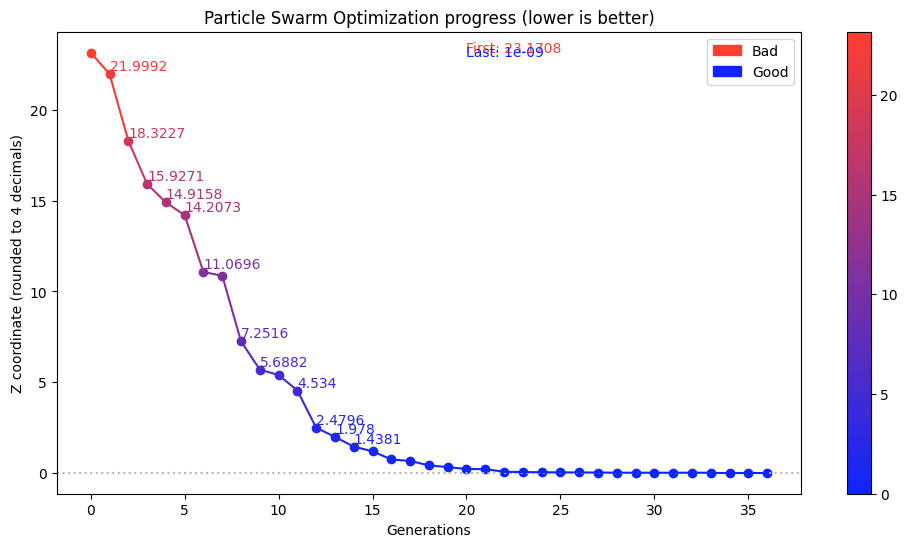

In [5]:
# Initialize plot with data
plot_2 = classes.PlotLine(pso_all)

# Show plot
plot_2.show()

In [6]:
pyplot.show()